# 1. Preliminaries

Set working directory

In [1]:
import sys
import os

os.chdir("../")

os.getcwd()

'/home/romagnolilab/Documents/GitHub/PROJECT'

Load Dependables

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from src.data_preprocess import DataPreprocessing
from src.dimensionality import DimensionalityReduction


Load Data

In [4]:
pathX = "data/raw/RawData.xlsx"

preprocess = DataPreprocessing()
data = preprocess.load_data(pathX, target_path = None, is_dataframe = True, justFeatures = False)

In [5]:
data.head()

,XMEAS1,XMEAS2,XMEAS3,XMEAS4,XMEAS5,XMEAS6,XMEAS7,XMEAS8,XMEAS9,XMEAS10,...,XMV3,XMV4,XMV5,XMV6,XMV7,XMV8,XMV9,XMV10,XMV11,XMV12
1,0.271033,3649.739415,4451.320791,9.223142,32.392900,47.559754,2798.975799,64.995825,122.898796,0.197826,...,26.662173,60.482854,0,24.229301,37.208198,46.430526,0,35.865322,12.930642,100
2,0.270826,3653.341885,4488.640140,9.211980,32.501953,47.374855,2800.296214,65.091251,122.877519,0.196092,...,26.689544,60.524644,0,24.171763,37.227431,46.427192,0,35.719177,11.714423,100
3,0.270474,3688.113265,4432.832766,9.235690,32.402838,47.817088,2802.647777,64.812363,122.916165,0.204023,...,26.705507,60.546193,0,25.179022,37.243766,46.442544,0,35.740715,10.734676,100
4,0.272127,3651.680041,4459.268940,9.192009,31.876790,47.869249,2803.693084,64.205417,122.892493,0.220561,...,26.768653,60.568588,0,26.922729,37.211698,46.407497,0,35.736154,10.311783,100
5,0.270939,3636.329271,4460.409756,9.277992,32.424754,47.509322,2804.787223,64.598623,122.890514,0.236146,...,26.396773,60.637598,0,29.039605,37.199517,46.424034,0,35.890716,11.181380,100


Transform Data

In [6]:
norm_data = preprocess.scale_data()
norm_data.head()

,XMEAS1,XMEAS2,XMEAS3,XMEAS4,XMEAS5,XMEAS6,XMEAS7,XMEAS8,XMEAS9,XMEAS10,...,XMV3,XMV4,XMV5,XMV6,XMV7,XMV8,XMV9,XMV10,XMV11,XMV12
0,0.350968,0.292521,0.238525,0.468659,0.777944,0.757940,0.516965,0.493909,0.450876,0.240103,...,0.266622,0.464588,0.0,0.241389,0.277760,0.580246,0.0,0.788559,0.310381,0.0
1,0.350702,0.308210,0.297161,0.459386,0.788652,0.739205,0.521489,0.509693,0.256541,0.238025,...,0.266895,0.470400,0.0,0.240813,0.280527,0.578484,0.0,0.769701,0.246380,0.0
2,0.350251,0.459634,0.209477,0.479083,0.778920,0.784015,0.529546,0.463563,0.609511,0.247526,...,0.267055,0.473396,0.0,0.250898,0.282877,0.586596,0.0,0.772480,0.194822,0.0
3,0.352372,0.300972,0.251013,0.442794,0.727265,0.789300,0.533128,0.363171,0.393308,0.267338,...,0.267687,0.476511,0.0,0.268356,0.278263,0.568077,0.0,0.771891,0.172568,0.0
4,0.350848,0.234122,0.252805,0.514226,0.781072,0.752830,0.536877,0.428209,0.375227,0.286009,...,0.263968,0.486108,0.0,0.289550,0.276511,0.576815,0.0,0.791836,0.218329,0.0


# 2. Dimensionality Reduction

In [7]:
dreduction = DimensionalityReduction(norm_data)

## 2.1 PCA

A. Number of Components = 2

In [8]:
pca_2D_data = dreduction.fit_PCA(n_comp = 2)

B. Number of Components = 3

In [9]:
pca_3D_data = dreduction.fit_PCA(n_comp = 3)

# 2.2 tSNE

A. number of components = 2

In [10]:
tsne_2D_data = dreduction.fit_tSNE(n_comp = 2, perplexity = 5)

B. number of component = 3

In [11]:
tsne_3D_data = dreduction.fit_tSNE(n_comp = 3, perplexity = 5)

# 2.3 ISOMAP

A. number of component = 2

In [12]:
ISOMAP_2D_data = dreduction.fit_isomap(n_comp = 2, neighbors = 5)

B. number of component = 3

In [13]:
ISOMAP_3D_data = dreduction.fit_isomap(n_comp = 3, neighbors = 5)

# 2.4 fast ICA

A. number of components = 2

In [14]:
fastICA_2D_data = dreduction.fit_fastICA(n_comp = 2, iterations = 100000)

B. number of components = 3

In [15]:
fastICA_3D_data = dreduction.fit_fastICA(n_comp = 3, iterations = 100000)

# 2.5 Spectral Embedding

A. number of components = 2

In [16]:
embedding_2D_data = dreduction.fit_SpectralEmbedding(n_comp = 2)

B. number of components = 3

In [17]:
embedding_3D_data = dreduction.fit_SpectralEmbedding(n_comp = 3)

# 3. Clustering

In [136]:
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering, Birch, AgglomerativeClustering
import hdbscan


## 3.1 PCA inputs

### 3.1.1 KMEans

In [19]:
kmeans = KMeans(n_clusters = 5, random_state = 1, n_init = 10)

In [20]:
# fit data
kmeans_with_pca = kmeans.fit(pca_3D_data)
# predict cluster
kmeans_PCA_3D_data = kmeans_with_pca.predict(pca_3D_data)

Estimated number of clusters: 5
Estimated number of noise points: 0


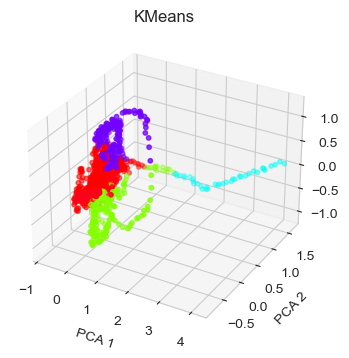

In [178]:
# plot cluster
fig = plt.figure(figsize=(6,4))
sns.set_style("whitegrid", {'axes.grid' : False})

axs = fig.add_subplot(111, projection='3d')

x = pca_3D_data[:, 0]
y = pca_3D_data[:, 1]
z = pca_3D_data[:, 2]

axs.scatter(x, y, z, c = kmeans_PCA_3D_data, s = 10, cmap = 'hsv')

axs.set_xlabel('PCA 1')
axs.set_ylabel('PCA 2')
axs.set_zlabel('PCA 3')
axs.set_title('KMeans')

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(kmeans_PCA_3D_data)) - (1 if -1 in kmeans_PCA_3D_data else 0)
n_noise_ = list(kmeans_PCA_3D_data).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

### 3.1.2 AgglomerativeClustering

In [180]:
# instantiate algorithm
aggloClust = AgglomerativeClustering(n_clusters = 5)

In [181]:
# fit data 
aggloClust_with_pca = aggloClust.fit(pca_3D_data)

In [182]:
# predict cluster
aggloClust_PCA_3D_data = aggloClust_with_pca.labels_

Estimated number of clusters: 5
Estimated number of noise points: 0


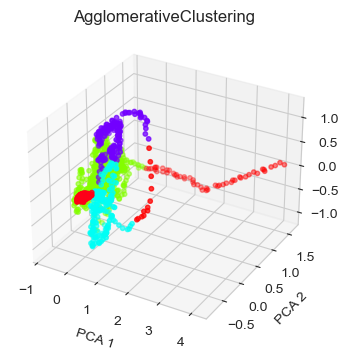

In [183]:
# plot cluster
fig = plt.figure(figsize=(6,4))
sns.set_style("whitegrid", {'axes.grid' : False})

axs = fig.add_subplot(111, projection='3d')

x = pca_3D_data[:, 0]
y = pca_3D_data[:, 1]
z = pca_3D_data[:, 2]

axs.scatter(x, y, z, c = aggloClust_PCA_3D_data, s = 10, cmap = 'hsv')

axs.set_xlabel('PCA 1')
axs.set_ylabel('PCA 2')
axs.set_zlabel('PCA 3')
axs.set_title('AgglomerativeClustering')


# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(aggloClust_PCA_3D_data)) - (1 if -1 in aggloClust_PCA_3D_data else 0)
n_noise_ = list(aggloClust_PCA_3D_data).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

### 3.1.3 DBSCAN

In [125]:
dbscan = DBSCAN(eps=0.1, min_samples=15)

In [126]:
# fit data and predict cluster
dbscan_with_pca = dbscan.fit_predict(pca_3D_data)

Estimated number of clusters: 5
Estimated number of noise points: 691


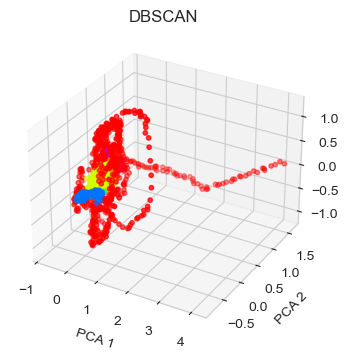

In [179]:
# plot cluster
fig = plt.figure(figsize=(6,4))
sns.set_style("whitegrid", {'axes.grid' : False})

axs = fig.add_subplot(111, projection='3d')

x = pca_3D_data[:, 0]
y = pca_3D_data[:, 1]
z = pca_3D_data[:, 2]

axs.scatter(x, y, z, c = dbscan_with_pca, s = 10, cmap = 'hsv')

axs.set_xlabel('PCA 1')
axs.set_ylabel('PCA 2')
axs.set_zlabel('PCA 3')
axs.set_title('DBSCAN')


# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(dbscan_with_pca)) - (1 if -1 in dbscan_with_pca else 0)
n_noise_ = list(dbscan_with_pca).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

In [90]:
set(dbscan_with_pca)

{-1, 0, 1, 2, 3, 4, 5}

Effect of min_samples: number of samples (or total weight) in a neighborhood for a point to be considered as a core point

In [158]:
# Effect of min_samples
def effect_of_min_samples(data, eps = 0.1, parameters = [1, 5, 10, 15, 20, 30], type = 'PCA'):

    result_dbscan_3D_data = {}
    cluster = {}
    noise = {}

    for idx, ms in enumerate(parameters):

        dbscan_3D = DBSCAN(eps = eps, min_samples = ms)

        dbscan_3D_data = dbscan_3D.fit_predict(data)

        result_dbscan_3D_data['M' + str(idx)] = dbscan_3D_data
        cluster['M'+str(idx)] = len(set(dbscan_3D_data)) - (1 if -1 in dbscan_3D_data else 0)
        noise['M'+str(idx)] = list(dbscan_3D_data).count(-1)

    # create a figure and a subplot grid with 3 rows and 2 columns

    fig = plt.figure(figsize=(10, 8), layout='constrained')
    sns.set_style("whitegrid", {'axes.grid' : False})
    
    # create scatter plots on the subplots using Seaborn
    x = data[:, 0]; y = data[:, 1]; z = data[:, 2]
    
    axs321 = fig.add_subplot(231, projection='3d')
    axs321.scatter(x, y, z, c = result_dbscan_3D_data['M0'],  s = 10, cmap = 'hsv')
    
    axs322 = fig.add_subplot(232, projection='3d')
    axs322.scatter(x, y, z, c = result_dbscan_3D_data['M1'],  s = 10, cmap = 'hsv')
    
    axs323 = fig.add_subplot(233, projection='3d')
    axs323.scatter(x, y, z, c = result_dbscan_3D_data['M2'],  s = 10, cmap = 'hsv')
    
    axs324 = fig.add_subplot(234, projection='3d')
    axs324.scatter(x, y, z, c = result_dbscan_3D_data['M3'],  s = 10, cmap = 'hsv')
    
    axs325 = fig.add_subplot(235, projection='3d')
    axs325.scatter(x, y, z, c = result_dbscan_3D_data['M4'],  s = 10, cmap = 'hsv')
    
    axs326 = fig.add_subplot(236, projection='3d')
    axs326.scatter(x, y, z, c = result_dbscan_3D_data['M5'],  s = 10, cmap = 'hsv')

    # set titles for each subplot
    axs321.set_title(f"S : {parameters[0]}, C: {cluster['M0']}, N: {noise['M0']}"); axs321.set_xlabel(f'{type[0]} 1'); axs321.set_ylabel(f'{type[0]} 2'); axs321.set_zlabel(f'{type[0]} 3')
    axs322.set_title(f"S : {parameters[1]}, C: {cluster['M1']}, N: {noise['M1']}"); axs322.set_xlabel(f'{type[0]} 1'); axs322.set_ylabel(f'{type[0]} 2'); axs322.set_zlabel(f'{type[0]} 3')
    axs323.set_title(f"S : {parameters[2]}, C: {cluster['M2']}, N: {noise['M2']}"); axs323.set_xlabel(f'{type[0]} 1'); axs323.set_ylabel(f'{type[0]} 2'); axs323.set_zlabel(f'{type[0]} 3')
    axs324.set_title(f"S : {parameters[3]}, C: {cluster['M3']}, N: {noise['M3']}"); axs324.set_xlabel(f'{type[0]} 1'); axs324.set_ylabel(f'{type[0]} 2'); axs324.set_zlabel(f'{type[0]} 3')
    axs325.set_title(f"S : {parameters[4]}, C: {cluster['M4']}, N: {noise['M4']}"); axs325.set_xlabel(f'{type[0]} 1'); axs325.set_ylabel(f'{type[0]} 2'); axs325.set_zlabel(f'{type[0]} 3')
    axs326.set_title(f"S : {parameters[5]}, C: {cluster['M5']}, N: {noise['M5']}"); axs326.set_xlabel(f'{type[0]} 1'); axs326.set_ylabel(f'{type[0]} 2'); axs326.set_zlabel(f'{type[0]} 3')

    # display the figure
    plt.show()

    # save figure
    plt.savefig(f'./reports/{type[0]}_{type[1]}_3D_scatterplot_manyMinimum_samples.png')

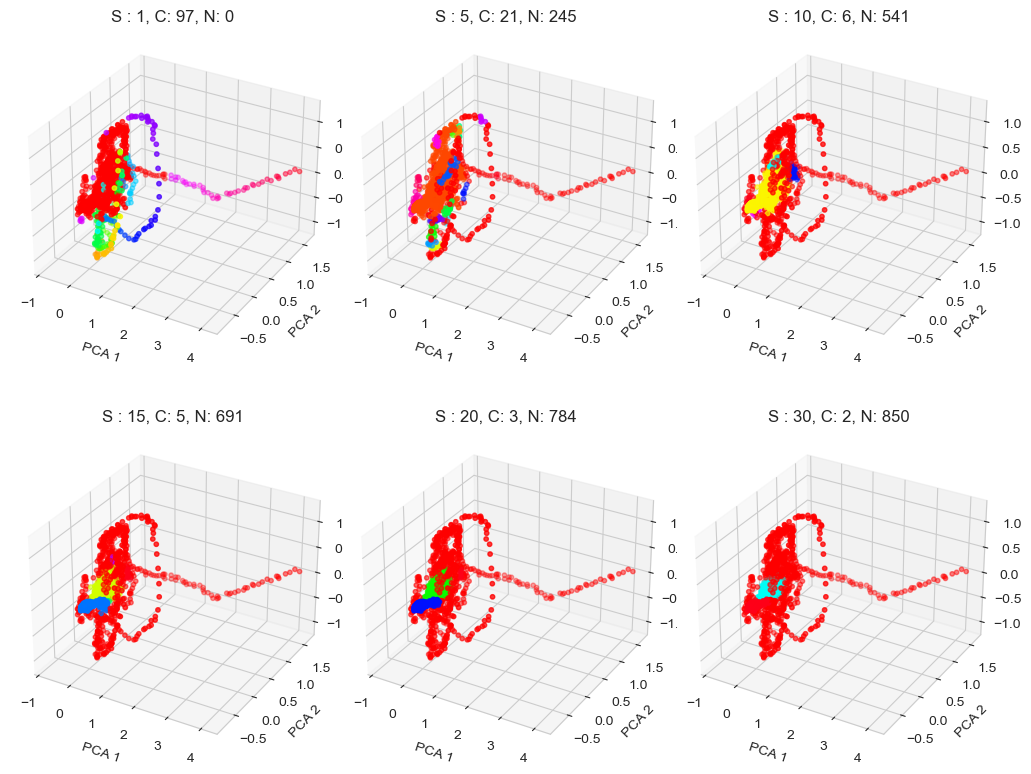

<Figure size 640x480 with 0 Axes>

In [160]:
effect_of_min_samples(
                        data = pca_3D_data, eps = 0.1, parameters = [1, 5, 10, 15, 20, 30], type = ['PCA', 'DBSCAN']
                        )

Effect of eps i.e. maximum distance between two samples for one to be considered as in the neighborhood of the other.

In [161]:
# Effect of min_samples
def effect_of_eps(data, min_sample_ = 15, parameters = [0.1, 0.3, 0.5, 1, 5, 10], type = 'PCA'):

    result_dbscan_3D_data = {}
    cluster = {}
    noise = {}

    for idx, ms in enumerate(parameters):

        dbscan_3D = DBSCAN(eps = ms, min_samples = min_sample_)

        dbscan_3D_data = dbscan_3D.fit_predict(data)

        result_dbscan_3D_data['M' + str(idx)] = dbscan_3D_data
        cluster['M'+str(idx)] = len(set(dbscan_3D_data)) - (1 if -1 in dbscan_3D_data else 0)
        noise['M'+str(idx)] = list(dbscan_3D_data).count(-1)

    # create a figure and a subplot grid with 3 rows and 2 columns

    fig = plt.figure(figsize=(10, 8), layout='constrained')
    sns.set_style("whitegrid", {'axes.grid' : False})
    
    # create scatter plots on the subplots using Seaborn
    x = data[:, 0]; y = data[:, 1]; z = data[:, 2]
    
    axs321 = fig.add_subplot(231, projection='3d')
    axs321.scatter(x, y, z, c = result_dbscan_3D_data['M0'],  s = 10, cmap = 'hsv')
    
    axs322 = fig.add_subplot(232, projection='3d')
    axs322.scatter(x, y, z, c = result_dbscan_3D_data['M1'],  s = 10, cmap = 'hsv')
    
    axs323 = fig.add_subplot(233, projection='3d')
    axs323.scatter(x, y, z, c = result_dbscan_3D_data['M2'],  s = 10, cmap = 'hsv')
    
    axs324 = fig.add_subplot(234, projection='3d')
    axs324.scatter(x, y, z, c = result_dbscan_3D_data['M3'],  s = 10, cmap = 'hsv')
    
    axs325 = fig.add_subplot(235, projection='3d')
    axs325.scatter(x, y, z, c = result_dbscan_3D_data['M4'],  s = 10, cmap = 'hsv')
    
    axs326 = fig.add_subplot(236, projection='3d')
    axs326.scatter(x, y, z, c = result_dbscan_3D_data['M5'],  s = 10, cmap = 'hsv')

    # set titles for each subplot
    axs321.set_title(f"eps : {parameters[0]}, C: {cluster['M0']}, N: {noise['M0']}"); axs321.set_xlabel(f'{type[0]} 1'); axs321.set_ylabel(f'{type[0]} 2'); axs321.set_zlabel(f'{type[0]} 3')
    axs322.set_title(f"eps : {parameters[1]}, C: {cluster['M1']}, N: {noise['M1']}"); axs322.set_xlabel(f'{type[0]} 1'); axs322.set_ylabel(f'{type[0]} 2'); axs322.set_zlabel(f'{type[0]} 3')
    axs323.set_title(f"eps : {parameters[2]}, C: {cluster['M2']}, N: {noise['M2']}"); axs323.set_xlabel(f'{type[0]} 1'); axs323.set_ylabel(f'{type[0]} 2'); axs323.set_zlabel(f'{type[0]} 3')
    axs324.set_title(f"eps : {parameters[3]}, C: {cluster['M3']}, N: {noise['M3']}"); axs324.set_xlabel(f'{type[0]} 1'); axs324.set_ylabel(f'{type[0]} 2'); axs324.set_zlabel(f'{type[0]} 3')
    axs325.set_title(f"eps : {parameters[4]}, C: {cluster['M4']}, N: {noise['M4']}"); axs325.set_xlabel(f'{type[0]} 1'); axs325.set_ylabel(f'{type[0]} 2'); axs325.set_zlabel(f'{type[0]} 3')
    axs326.set_title(f"eps : {parameters[5]}, C: {cluster['M5']}, N: {noise['M5']}"); axs326.set_xlabel(f'{type[0]} 1'); axs326.set_ylabel(f'{type[0]} 2'); axs326.set_zlabel(f'{type[0]} 3')

    # display the figure
    plt.show()

    # save figure
    plt.savefig(f'./reports/{type[0]}_{type[1]}_3D_scatterplot_manyEPS.png')

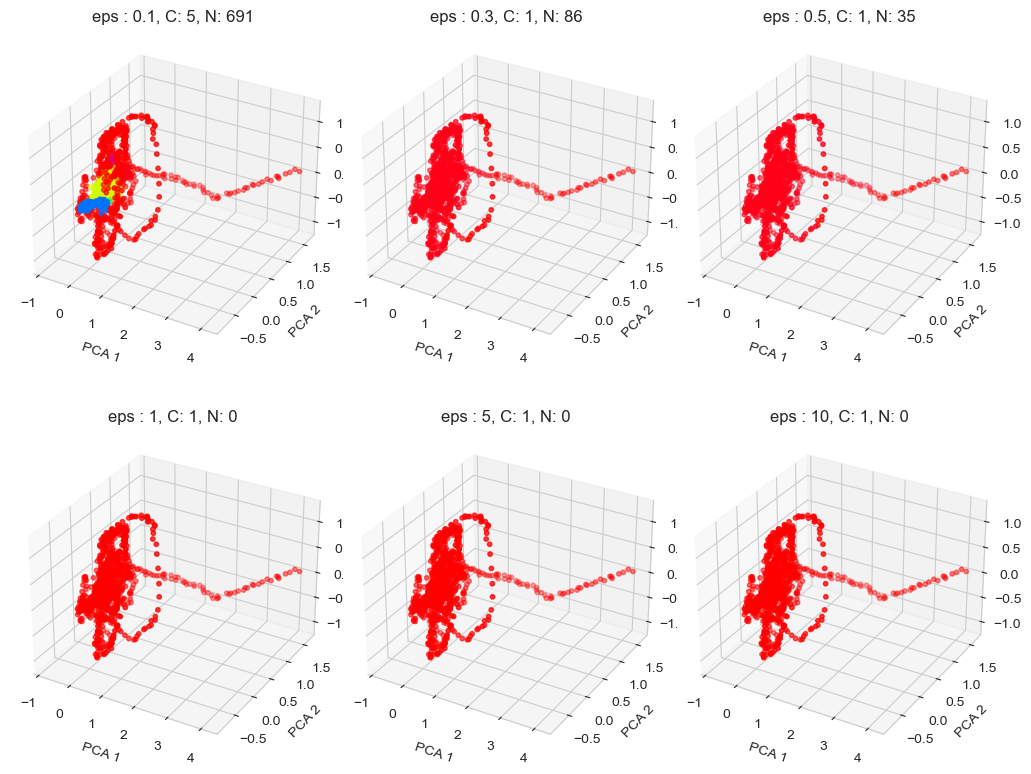

<Figure size 640x480 with 0 Axes>

In [162]:
effect_of_eps(
                        data = pca_3D_data, min_sample_ = 15, parameters = [0.1, 0.3, 0.5, 1, 5, 10], type = ['PCA', 'DBSCAN']
                        )

### 3.1.4 HDBSCAN

In [175]:
# instantiate algorithm
hdbscan_ = hdbscan.HDBSCAN(min_cluster_size = 5, min_samples = 28)

In [176]:
# fit data and predict cluster
hdbscan_PCA_3D_data = hdbscan_.fit_predict(pca_3D_data)

Estimated number of clusters: 5
Estimated number of noise points: 745


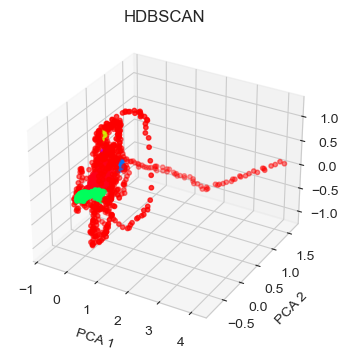

In [177]:
# plot cluster
fig = plt.figure(figsize=(6,4))
sns.set_style("whitegrid", {'axes.grid' : False})

axs = fig.add_subplot(111, projection='3d')

x = pca_3D_data[:, 0]
y = pca_3D_data[:, 1]
z = pca_3D_data[:, 2]

axs.scatter(x, y, z, c = hdbscan_PCA_3D_data, s = 10, cmap = 'hsv')

axs.set_xlabel('PCA 1')
axs.set_ylabel('PCA 2')
axs.set_zlabel('PCA 3')
axs.set_title('HDBSCAN')

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(hdbscan_PCA_3D_data)) - (1 if -1 in hdbscan_PCA_3D_data else 0)
n_noise_ = list(hdbscan_PCA_3D_data).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Effect of min_samples: number of samples (or total weight) in a neighborhood for a point to be considered as a core point. The simplest intuition for what min_samples does is provide a measure of how \
conservative you want you clustering to be. The larger the value of min_samples you provide, the more conservative the clustering – more points will be declared as noise, \
and clusters will be restricted to progressively more dense areas. We can see this in practice by leaving the min_cluster_size at 60, but reducing min_samples to 1.

In [165]:
# Effect of min_samples
def hdbscan_effect_of_min_samples(data, min_clust_size = 5, parameters = [1, 5, 10, 20, 30, 50], type = 'PCA'):

    result_dbscan_3D_data = {}
    cluster = {}
    noise = {}

    for idx, ms in enumerate(parameters):

        hdbscan_3D = hdbscan.HDBSCAN(min_cluster_size = min_clust_size, min_samples = ms)

        hdbscan_3D_data = hdbscan_3D.fit_predict(data)
        labels = hdbscan_3D.labels_

        result_dbscan_3D_data['M' + str(idx)] = hdbscan_3D_data
        cluster['M'+str(idx)] = len(set(labels)) - (1 if -1 in labels else 0)
        noise['M'+str(idx)] = list(labels).count(-1)

    # create a figure and a subplot grid with 3 rows and 2 columns

    fig = plt.figure(figsize=(10, 8), layout='constrained')
    sns.set_style("whitegrid", {'axes.grid' : False})
    
    # create scatter plots on the subplots using Seaborn
    x = data[:, 0]; y = data[:, 1]; z = data[:, 2]
    
    axs321 = fig.add_subplot(231, projection='3d')
    axs321.scatter(x, y, z, c = result_dbscan_3D_data['M0'],  s = 10, cmap = 'hsv')
    
    axs322 = fig.add_subplot(232, projection='3d')
    axs322.scatter(x, y, z, c = result_dbscan_3D_data['M1'],  s = 10, cmap = 'hsv')
    
    axs323 = fig.add_subplot(233, projection='3d')
    axs323.scatter(x, y, z, c = result_dbscan_3D_data['M2'],  s = 10, cmap = 'hsv')
    
    axs324 = fig.add_subplot(234, projection='3d')
    axs324.scatter(x, y, z, c = result_dbscan_3D_data['M3'],  s = 10, cmap = 'hsv')
    
    axs325 = fig.add_subplot(235, projection='3d')
    axs325.scatter(x, y, z, c = result_dbscan_3D_data['M4'],  s = 10, cmap = 'hsv')
    
    axs326 = fig.add_subplot(236, projection='3d')
    axs326.scatter(x, y, z, c = result_dbscan_3D_data['M5'],  s = 10, cmap = 'hsv')

    # set titles for each subplot
    axs321.set_title(f"mS : {parameters[0]}, C: {cluster['M0']}, N: {noise['M0']}"); axs321.set_xlabel(f'{type[0]} 1'); axs321.set_ylabel(f'{type[0]} 2'); axs321.set_zlabel(f'{type[0]} 3')
    axs322.set_title(f"mS : {parameters[1]}, C: {cluster['M1']}, N: {noise['M1']}"); axs322.set_xlabel(f'{type[0]} 1'); axs322.set_ylabel(f'{type[0]} 2'); axs322.set_zlabel(f'{type[0]} 3')
    axs323.set_title(f"mS : {parameters[2]}, C: {cluster['M2']}, N: {noise['M2']}"); axs323.set_xlabel(f'{type[0]} 1'); axs323.set_ylabel(f'{type[0]} 2'); axs323.set_zlabel(f'{type[0]} 3')
    axs324.set_title(f"mS : {parameters[3]}, C: {cluster['M3']}, N: {noise['M3']}"); axs324.set_xlabel(f'{type[0]} 1'); axs324.set_ylabel(f'{type[0]} 2'); axs324.set_zlabel(f'{type[0]} 3')
    axs325.set_title(f"mS : {parameters[4]}, C: {cluster['M4']}, N: {noise['M4']}"); axs325.set_xlabel(f'{type[0]} 1'); axs325.set_ylabel(f'{type[0]} 2'); axs325.set_zlabel(f'{type[0]} 3')
    axs326.set_title(f"mS : {parameters[5]}, C: {cluster['M5']}, N: {noise['M5']}"); axs326.set_xlabel(f'{type[0]} 1'); axs326.set_ylabel(f'{type[0]} 2'); axs326.set_zlabel(f'{type[0]} 3')

    # display the figure
    plt.show()

    # save figure
    plt.savefig(f'./reports/{type[0]}_{type[1]}_3D_scatterplot_manyMinimum_samples.png')

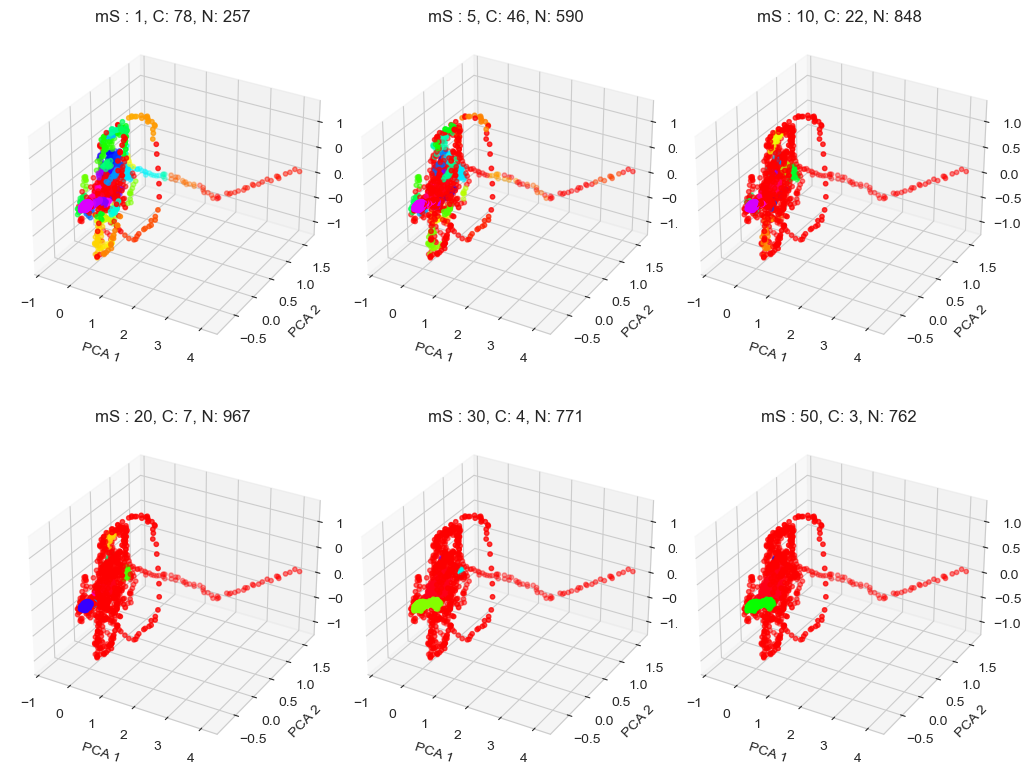

<Figure size 640x480 with 0 Axes>

In [167]:
hdbscan_effect_of_min_samples(data = pca_3D_data, min_clust_size = 5, parameters = [1, 5, 10, 20, 30, 50], type = ['PCA', 'HDSCAN'])

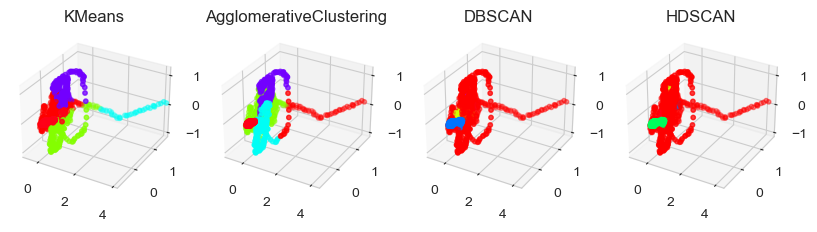

<Figure size 640x480 with 0 Axes>

In [188]:
# plot cluster
fig = plt.figure(figsize=(10,8))
sns.set_style("whitegrid", {'axes.grid' : True})

## PCA
type = 'PCA_allClustering'

x = pca_3D_data[:, 0]
y = pca_3D_data[:, 1]
z = pca_3D_data[:, 2]


# KMeans
axs = fig.add_subplot(141, projection='3d')

axs.scatter(x, y, z, c = kmeans_PCA_3D_data, s = 10, cmap = 'hsv'); axs.set_title('KMeans'); axs.set_xlim([x.min(), x.max()]); axs.set_ylim([y.min(), y.max()]); axs.set_zlim([z.min(), z.max()]); 

# AgglomerativeClustering
axs = fig.add_subplot(142, projection='3d')

axs.scatter(x, y, z, c = aggloClust_PCA_3D_data, s = 10, cmap = 'hsv'); axs.set_title('AgglomerativeClustering'); axs.set_ylim([y.min(), y.max()]); axs.set_zlim([z.min(), z.max()]); 

## DBSCAN
axs = fig.add_subplot(143, projection='3d')

axs.scatter(x, y, z, c = dbscan_with_pca, s = 10, cmap = 'hsv'); axs.set_title('DBSCAN'); axs.set_ylim([y.min(), y.max()]); axs.set_zlim([z.min(), z.max()]); 


## Spectral Embedding
axs = fig.add_subplot(144, projection='3d')

axs.scatter(x, y, z, c = hdbscan_PCA_3D_data, s = 10, cmap = 'hsv'); axs.set_title('HDSCAN'); axs.set_ylim([y.min(), y.max()]); axs.set_zlim([z.min(), z.max()]); 

# display the figure
plt.show()

# save figure
plt.savefig(f'./reports/{type}_3D_scatterplot.png')

